In [1]:
# Goal: Measure the timing of the prebump plateau in 2019odp compared to 2008D
import sys, os, functools, pprint
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import astropy.constants as aconst
import astropy.units as u
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import astropy.table as table
from astropy.cosmology import Planck15 as cosmology
import seaborn
import numba
import pandas as pd

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataset as dataset
import snelib19odp.colors as colors

In [63]:
ds_19odp = dataset.load_dataset('SN2019odp_phot')
ds_08d = dataset.load_dataset('SN2008D')

#d_19odp = 5*(np.log10(34e6)-1)
d_19odp = 34.0 # NED
print('D 2019odp', d_19odp)
d_08d = 5*(np.log10(33.69e6)-1)
print('D 2008D', d_08d)

distmod_19odp = np.random.normal(34.0, 0.2, size=1000)
distmod_08d = 5*(np.log10(np.random.normal(33.69, 2.36, size=1000)*1e6)-1)

D 2019odp 34.0
D 2008D 32.6375050549056


In [3]:
# lets first try out plateau-contardo model to get the absolute plateau magnitudes

/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


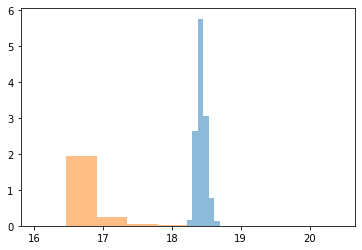

In [3]:
x19odp = ds_19odp.get_phot_model('plateau-contardo', 'r').parameter_trace_table
x08d = ds_08d.get_phot_model('plateau-contardo', 'r').parameter_trace_table



plt.hist(x19odp['plateau_level'], alpha=0.5, histtype='stepfilled', density=True);
plt.hist(x08d['plateau_level'], alpha=0.5, histtype='stepfilled', density=True);

In [13]:
# run also the prebump-contardo for g & r for SN2019odp
for band in 'gr':
    x_19odp = ds_19odp.get_phot_model('prebump-contardo', band).parameter_trace_table

In [ ]:
# Compare plateau level against prebump amplitude (although computed)

SN2019odp g -15.798928686962599 -0.2116708604205524 0.24047574769578084
SN2008D g -15.26998422046259 -0.5458279367621888 0.624230294194966
SN2019odp r -15.575152920215956 -0.19618792953377628 0.20055122514575174
SN2008D r -15.780632819729627 -0.32934713882733213 0.3386922477101919


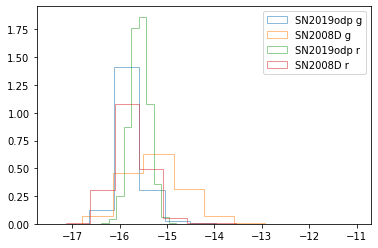

In [61]:
for band in 'gr':
    x19odp = ds_19odp.get_phot_model('plateau-contardo', band).parameter_trace_table
    if band == 'g':
        x08d = ds_08d.get_phot_model('plateau-contardo', 'V').parameter_trace_table
    else:
        x08d = ds_08d.get_phot_model('plateau-contardo', band).parameter_trace_table
    combined_19odp = ds_19odp.get_combined_lc(band)
    if band == 'g':
        combined_08d = ds_08d.get_combined_lc("V")
    else:
        combined_08d = ds_08d.get_combined_lc(band)
    #print(combined['mag_err_correlated'])
    correlated_err_19odp = np.nanmax(combined_19odp['mag_err_correlated'])
    correlated_err_08d = np.nanmax(combined_08d['mag_err_correlated'])
    #print(correlated_err)
    x_odp = x19odp['plateau_level']-d_19odp+np.random.normal(0, correlated_err_19odp, size=len(x19odp))
    x_08d = x08d['plateau_level']-d_08d+np.random.normal(0, correlated_err_08d, size=len(x08d))
    #m = np.nanmedian(x19odp['plateau_level']-d_19odp)
    #p = np.percentile(x19odp['plateau_level']-d_19odp, [15.89, 84.1])
    
    plt.hist(x_odp, label='SN2019odp %s' % band, histtype='step', alpha=0.5, density=True)
    plt.hist(x_08d, label='SN2008D %s' % band, histtype='step', alpha=0.5, density=True)
    
    m_odp = np.nanmedian(x_odp)
    p_odp = np.percentile(x_odp, [15.89, 84.1])
    #print('SN2019odp', band, np.percentile(x19odp['plateau_level']-d_19odp, [15.89, 50, 84.1]))
    print('SN2019odp', band, m_odp, p_odp[0]-m_odp, p_odp[1]-m_odp)
    
    m_08d = np.nanmedian(x_08d)
    p_08d = np.percentile(x_08d, [15.89, 84.1])
    #print('SN2019odp', band, np.percentile(x19odp['plateau_level']-d_19odp, [15.89, 50, 84.1]))
    print('SN2008D', band, m_08d, p_08d[0]-m_08d, p_08d[1]-m_08d)
    
plt.legend()

In [18]:
for band in 'gr':
    x19odp = ds_19odp.get_phot_model('prebump-contardo', band).parameter_trace_table
    if band == 'g':
        x08d = ds_08d.get_phot_model('prebump-contardo', 'V').parameter_trace_table
    else:
        x08d = ds_08d.get_phot_model('prebump-contardo', band).parameter_trace_table
    combined_19odp = ds_19odp.get_combined_lc(band)
    if band == 'g':
        combined_08d = ds_08d.get_combined_lc("V")
    else:
        combined_08d = ds_08d.get_combined_lc(band)
    #print(x08d.colnames)
    #print(combined['mag_err_correlated'])
    correlated_err_19odp = np.nanmax(combined_19odp['mag_err_correlated'])
    correlated_err_08d = np.nanmax(combined_08d['mag_err_correlated'])
    #print(correlated_err)
    x_odp = x19odp['prebump_amplitude']-d_19odp+np.random.normal(0, correlated_err_19odp, size=len(x19odp))
    x_08d = x08d['prebump_amplitude']-d_08d+np.random.normal(0, correlated_err_08d, size=len(x08d))
    #m = np.nanmedian(x19odp['plateau_level']-d_19odp)
    #p = np.percentile(x19odp['plateau_level']-d_19odp, [15.89, 84.1])
    
    plt.hist(x_odp, label='SN2019odp %s' % band, histtype='step', alpha=0.5, density=True)
    plt.hist(x_08d, label='SN2008D %s' % band, histtype='step', alpha=0.5, density=True)
    
    m_odp = np.nanmedian(x_odp)
    p_odp = np.percentile(x_odp, [15.89, 84.1])
    #print('SN2019odp', band, np.percentile(x19odp['plateau_level']-d_19odp, [15.89, 50, 84.1]))
    print('SN2019odp', band, m_odp, p_odp[0]-m_odp, p_odp[1]-m_odp)
    
    m_08d = np.nanmedian(x_08d)
    p_08d = np.percentile(x_08d, [15.89, 84.1])
    #print('SN2019odp', band, np.percentile(x19odp['plateau_level']-d_19odp, [15.89, 50, 84.1]))
    print('SN2008D', band, m_08d, p_08d[0]-m_08d, p_08d[1]-m_08d)
    
plt.legend()

SN2019odp g -36.38791777434618 -3.402188795136844 1.8569797336966545
SN2008D g -33.26895610695743 -0.4437273394998016 0.4022858108153784
SN2019odp r -34.635372548148766 -0.9110963829339624 0.6675188615320309
SN2008D r -33.506564717655976 -0.4860442263555811 0.41387173346628003


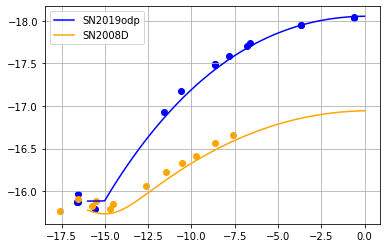

In [39]:
# plot the two lightcurves
phase_grid = np.linspace(-16, 0)
t_sn2019odp = phase_grid + ds_19odp.transient.prior_t0
t_sn2008d = phase_grid + ds_08d.transient.prior_t0
plt.plot(phase_grid, ds_19odp.get_interpolated('g', t_grid=t_sn2019odp, parametric=True)-d_19odp, label='SN2019odp', color='blue')
#plt.plot(phase_grid, ds_19odp.get_interpolated('g', t_grid=t_sn2019odp, parametric=False)-d_19odp, label='SN2019odp', color='blue', alpha=0.5)
#plt.plot(phase_grid, ds_19odp.sample_abs_lc())
lcc_odp = ds_19odp.get_interpolator('g').get_corrected_obs_dataset()
idx = (lcc_odp['mjd'] - ds_19odp.transient.prior_t0) < 0
plt.scatter(lcc_odp['mjd'][idx] - ds_19odp.transient.prior_t0, lcc_odp['mag'][idx] - d_19odp, color='blue')

plt.plot(phase_grid, ds_08d.get_interpolated('V', t_grid=t_sn2008d, parametric=True)-d_08d, label='SN2008D', color='orange')
lcc_d = ds_08d.get_interpolator('V').get_corrected_obs_dataset()
idx = (lcc_d['mjd'] - ds_08d.transient.prior_t0) < 0
plt.scatter(lcc_d['mjd'][idx] - ds_08d.transient.prior_t0, lcc_d['mag'][idx] - d_08d, color='orange')

plt.legend()
plt.gca().invert_yaxis()
plt.grid()

In [46]:
# compare the sampled LCs
for i in range(100):
    phase_grid = np.linspace(-17, -8)
    
    t_sn2019odp = phase_grid + ds_19odp.transient.prior_t0
    t_sn2008d = phase_grid + ds_08d.transient.prior_t0
    plt.plot(phase_grid, ds_19odp.get_interpolated('g', t_grid=t_sn2019odp, parametric=True, sample=i*100)-d_19odp, label='SN2019odp', color='blue', alpha=0.1)
    plt.plot(phase_grid, ds_08d.get_interpolated('V', t_grid=t_sn2008d, parametric=True, sample=i*100)-d_08d, label='SN2008D', color='orange', alpha=0.1)

plt.gca().invert_yaxis()
plt.grid()

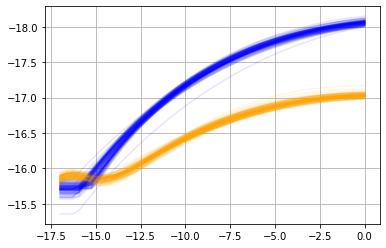

In [47]:
# compare the sampled LCs
for i in range(100):
    phase_grid = np.linspace(-17, 0)
    
    t_sn2019odp = phase_grid + ds_19odp.transient.prior_t0
    t_sn2008d = phase_grid + ds_08d.transient.prior_t0
    plt.plot(phase_grid, ds_19odp.get_interpolated('r', t_grid=t_sn2019odp, parametric=True, sample=i*100)-d_19odp, label='SN2019odp', color='blue', alpha=0.1)
    plt.plot(phase_grid, ds_08d.get_interpolated('r', t_grid=t_sn2008d, parametric=True, sample=i*100)-d_08d, label='SN2008D', color='orange', alpha=0.1)

plt.gca().invert_yaxis()
plt.grid()

SN2019odp g -16.605104200003552 -14
	[-16.3957927  -16.29760936 -16.14687334]
SN2019odp g -16.605104200003552 -14
	[-16.6376536  -16.27103761 -15.92869346]
SN2008D V -17.58965999999782 -14
	[-15.98941671 -15.90624194 -15.83033978]
SN2008D V -17.58965999999782 -14
	[-16.13331306 -15.89419571 -15.61917693]


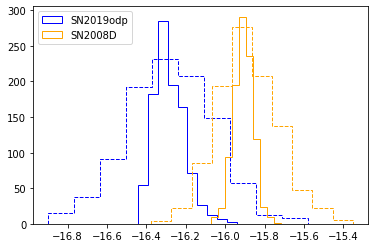

In [68]:
# compare the absolute mag in time range [first_detection, -14d]

def extract_mags(ds, band, parametric, dist_mod):
    t_min = ds.first_detection_mjd_band(band)
    t_max = ds.transient.prior_t0 - 14
    print(ds.transient.name, band, t_min - ds.transient.prior_t0, t_max - ds.transient.prior_t0)
    t_grid = np.linspace(t_min, t_max)
    ret = np.empty(1000)
    for i in range(1000):
        mags = ds.get_interpolated(band, t_grid=t_grid, parametric=parametric, sample=10*i)-dist_mod[i]
        ret[i] = np.percentile(mags, 5)
    print(f"\t{np.percentile(ret, [5, 50, 95])}")
    return ret

plt.hist(extract_mags(ds_19odp, 'g', True, d_19odp*np.ones(1000)), label='SN2019odp', histtype='step', color='blue')
plt.hist(extract_mags(ds_19odp, 'g', False, distmod_19odp), histtype='step', color='blue', ls='--')
plt.hist(extract_mags(ds_08d, 'V', True, d_08d*np.ones(1000)), label='SN2008D', histtype='step', color='orange')
plt.hist(extract_mags(ds_08d, 'V', False, distmod_08d), histtype='step', color='orange', ls='--')

plt.legend()

In [69]:
plt.hist(extract_mags(ds_19odp, 'r', True, d_19odp*np.ones(1000)), label='SN2019odp', histtype='step', color='blue')
plt.hist(extract_mags(ds_19odp, 'r', False, distmod_19odp), histtype='step', color='blue', ls='--')
plt.hist(extract_mags(ds_08d, 'r', True, d_08d*np.ones(1000)), label='SN2008D', histtype='step', color='orange')
plt.hist(extract_mags(ds_08d, 'r', False, distmod_08d), histtype='step', color='orange', ls='--')

plt.legend()

SN2019odp r -17.611192099997425 -14
	[-16.29244871 -16.20274015 -16.08608362]
SN2019odp r -17.611192099997425 -14
	[-16.50402862 -16.16597919 -15.8426339 ]
SN2008D r -17.591999999996915 -14
	[-15.96695372 -15.90467319 -15.84872576]
SN2008D r -17.591999999996915 -14
	[-16.13935201 -15.89833809 -15.6258531 ]


In [60]:
# uncertainty of distance modulus
# 0.2 mag for SN2019odp
d = np.random.normal(33.69, 2.36, size=1000)*1e6
dmod = 5 * np.log10(d) - 5
dmod2 = np.random.normal(32, 0.2, size=1000)
diff = dmod2 - dmod
plt.hist(diff)
np.std(diff)
#plt.hist(dmod)
#np.std(dmod)

0.2572048965350459

/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


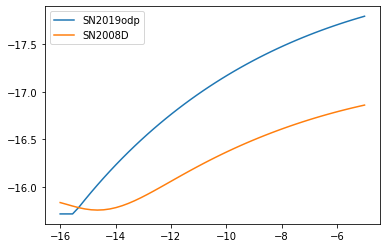

In [32]:
# plot the two lightcurves
phase_grid = np.linspace(-16, -5)
t_sn2019odp = phase_grid + ds_19odp.transient.prior_t0
t_sn2008d = phase_grid + ds_08d.transient.prior_t0
plt.plot(phase_grid, ds_19odp.get_interpolated('r', t_grid=t_sn2019odp, parametric=True)-d_19odp, label='SN2019odp')
plt.plot(phase_grid, ds_08d.get_interpolated('r', t_grid=t_sn2008d, parametric=True)-d_08d, label='SN2008D')
plt.legend()
plt.gca().invert_yaxis()

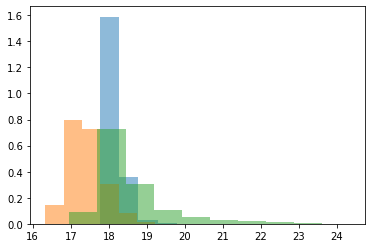

In [19]:
x19odp = ds_19odp.get_phot_model('plateau-contardo', 'g').parameter_trace_table
x08d = ds_08d.get_phot_model('plateau-contardo', 'V').parameter_trace_table
x08d_b = ds_08d.get_phot_model('plateau-contardo', 'B').parameter_trace_table

plt.hist(x19odp['plateau_level'], alpha=0.5, histtype='stepfilled', density=True);
plt.hist(x08d['plateau_level'], alpha=0.5, histtype='stepfilled', density=True);
plt.hist(x08d_b['plateau_level'], alpha=0.5, histtype='stepfilled', density=True);

In [6]:
x19odp = ds_19odp.get_phot_model('plateau-contardo', 'r').parameter_trace_table
x08d = ds_08d.get_phot_model('plateau-contardo', 'r').parameter_trace_table

print('SN2019odp', np.percentile(x19odp['plateau_level'], [5, 50, 95]))
print('SN2008D', np.percentile(x08d['plateau_level'], [5, 50, 95]))

SN2019odp [18.324911   18.42173208 18.55196059]
SN2008D [16.76830408 16.83978202 17.06876388]


In [7]:
x19odp = ds_19odp.get_phot_model('plateau-contardo', 'i').parameter_trace_table
x08d = ds_08d.get_phot_model('plateau-contardo', 'i').parameter_trace_table

print('SN2019odp', np.percentile(x19odp['plateau_level'], [5, 50, 95]))
print('SN2008D', np.percentile(x08d['plateau_level'], [5, 50, 95]))

SN2019odp [18.61249409 18.96531661 19.33544428]
SN2008D [16.06143865 16.30410301 16.80480167]


In [27]:
x19odp = ds_19odp.get_phot_model('plateau-contardo', 'g').parameter_trace_table
x08d = ds_08d.get_phot_model('plateau-contardo', 'V').parameter_trace_table
x08d_b = ds_08d.get_phot_model('plateau-contardo', 'B').parameter_trace_table

print('SN2019odp', np.percentile(x19odp['plateau_level'], [5, 50, 95]))
print('SN2008D V', np.percentile(x08d['plateau_level'], [5, 50, 95]))
print('SN2008D B', np.percentile(x08d_b['plateau_level'], [5, 50, 95]))

SN2019odp [18.08229087 18.17182491 18.54344204]
SN2008D V [16.79708052 17.35612434 18.26082926]
SN2008D B [17.65813681 18.29122006 20.63437587]


SN2008D [13.83127046 14.32847067 14.80658353]


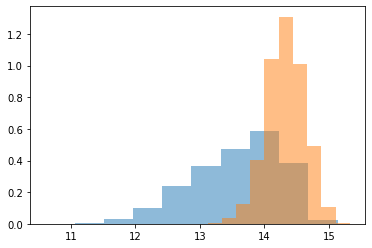

In [35]:
x19odp = ds_19odp.get_phot_model('prebump-contardo', 'r').parameter_trace_table
x08d = ds_08d.get_phot_model('prebump-contardo', 'r').parameter_trace_table

phase = x08d['prebump_t0']
pba_08d = x08d['linear_intercept'] + x08d['linear_slope']/1e3 * phase + x08d['gaussian_amplitude'] * np.exp(-(phase-x08d['gaussian_t0'])**2 / 2 / x08d['gaussian_sigma']**2) + x08d['prebump_amplitude']

phase = x19odp['prebump_t0']
pba_19odp = x19odp['linear_intercept'] + x19odp['linear_slope']/1e3 * phase + x19odp['gaussian_amplitude'] * np.exp(-(phase-x19odp['gaussian_t0'])**2 / 2 / x19odp['gaussian_sigma']**2) + x19odp['prebump_amplitude']

print('SN2008D', np.percentile(pba_08d, [5, 50, 95]))

plt.hist(pba_19odp, alpha=0.5, histtype='stepfilled', density=True);
plt.hist(pba_08d, alpha=0.5, histtype='stepfilled', density=True);

SN2008D [13.57625744 14.12789927 14.50467376]


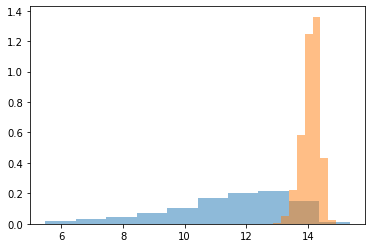

In [34]:
x19odp = ds_19odp.get_phot_model('prebump-contardo', 'i').parameter_trace_table
x08d = ds_08d.get_phot_model('prebump-contardo', 'i').parameter_trace_table

phase = x08d['prebump_t0']
pba_08d = x08d['linear_intercept'] + x08d['linear_slope']/1e3 * phase + x08d['gaussian_amplitude'] * np.exp(-(phase-x08d['gaussian_t0'])**2 / 2 / x08d['gaussian_sigma']**2) + x08d['prebump_amplitude']

phase = x19odp['prebump_t0']
pba_19odp = x19odp['linear_intercept'] + x19odp['linear_slope']/1e3 * phase + x19odp['gaussian_amplitude'] * np.exp(-(phase-x19odp['gaussian_t0'])**2 / 2 / x19odp['gaussian_sigma']**2) + x19odp['prebump_amplitude']

print('SN2008D', np.percentile(pba_08d, [5, 50, 95]))

plt.hist(pba_19odp, alpha=0.5, histtype='stepfilled', density=True);
plt.hist(pba_08d, alpha=0.5, histtype='stepfilled', density=True);

SN2008D [14.10214857 14.82033057 15.37677416]


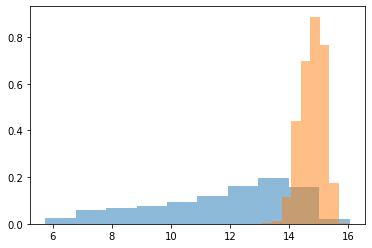

In [31]:
x19odp = ds_19odp.get_phot_model('prebump-contardo', 'g').parameter_trace_table
x08d = ds_08d.get_phot_model('prebump-contardo', 'V').parameter_trace_table

phase = x08d['prebump_t0']
pba_08d = x08d['linear_intercept'] + x08d['linear_slope']/1e3 * phase + x08d['gaussian_amplitude'] * np.exp(-(phase-x08d['gaussian_t0'])**2 / 2 / x08d['gaussian_sigma']**2) + x08d['prebump_amplitude']

phase = x19odp['prebump_t0']
pba_19odp = x19odp['linear_intercept'] + x19odp['linear_slope']/1e3 * phase + x19odp['gaussian_amplitude'] * np.exp(-(phase-x19odp['gaussian_t0'])**2 / 2 / x19odp['gaussian_sigma']**2) + x19odp['prebump_amplitude']

print('SN2008D', np.percentile(pba_08d, [5, 50, 95]))

plt.hist(pba_19odp, alpha=0.5, histtype='stepfilled', density=True);
plt.hist(pba_08d, alpha=0.5, histtype='stepfilled', density=True);

In [11]:
# now try to estimate the time of this bump
# times are relative phase to prior_t0

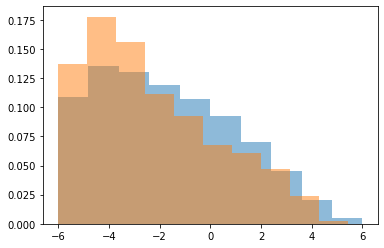

In [12]:
x19odp = ds_19odp.get_phot_model('prebump-contardo', 'r').parameter_trace_table
x08d = ds_08d.get_phot_model('prebump-contardo', 'r').parameter_trace_table

plt.hist(x19odp['gaussian_t0'], alpha=0.5, histtype='stepfilled', density=True);
plt.hist(x08d['gaussian_t0'], alpha=0.5, histtype='stepfilled', density=True);

In [13]:
x19odp = ds_19odp.get_phot_model('prebump-contardo', 'r').parameter_trace_table
x08d = ds_08d.get_phot_model('prebump-contardo', 'r').parameter_trace_table

plt.hist(x19odp['prebump_t0'], alpha=0.5, histtype='stepfilled', density=True);
plt.hist(x08d['prebump_t0'], alpha=0.5, histtype='stepfilled', density=True);

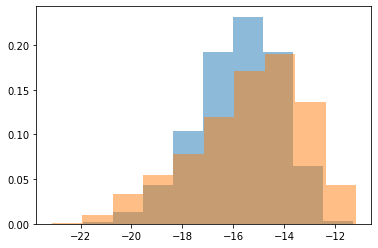

In [14]:
x19odp = ds_19odp.get_phot_model('prebump-contardo', 'g').parameter_trace_table
x08d = ds_08d.get_phot_model('prebump-contardo', 'V').parameter_trace_table

plt.hist(x19odp['prebump_t0']-x19odp['gaussian_t0'], alpha=0.5, histtype='stepfilled', density=True);
plt.hist(x08d['prebump_t0']-x08d['gaussian_t0'], alpha=0.5, histtype='stepfilled', density=True);

In [15]:
x19odp = ds_19odp.get_phot_model('prebump-contardo', 'r').parameter_trace_table
x08d = ds_08d.get_phot_model('prebump-contardo', 'r').parameter_trace_table

print('SN2019odp', np.percentile(x19odp['prebump_t0']-x19odp['gaussian_t0'], [5, 50, 95]))
print('SN2008D', np.percentile(x08d['prebump_t0']-x08d['gaussian_t0'], [5, 50, 95]))

SN2019odp [-23.82990851 -18.21645605 -14.15732126]
SN2008D [-20.76979043 -14.69225216 -11.94184074]


In [33]:
x19odp = ds_19odp.get_phot_model('prebump-contardo', 'i').parameter_trace_table
x08d = ds_08d.get_phot_model('prebump-contardo', 'i').parameter_trace_table

print('SN2019odp', np.percentile(x19odp['prebump_t0']-x19odp['gaussian_t0'], [5, 50, 95]))
print('SN2008D', np.percentile(x08d['prebump_t0']-x08d['gaussian_t0'], [5, 50, 95]))

SN2019odp [-22.31038484 -16.65401149 -13.13132416]
SN2008D [-21.19205775 -15.26575008 -11.96555435]


In [16]:
x19odp = ds_19odp.get_phot_model('prebump-contardo', 'g').parameter_trace_table
x08d = ds_08d.get_phot_model('prebump-contardo', 'V').parameter_trace_table

print('SN2019odp', np.percentile(x19odp['prebump_t0']-x19odp['gaussian_t0'], [5, 50, 95]))
print('SN2008D', np.percentile(x08d['prebump_t0']-x08d['gaussian_t0'], [5, 50, 95]))

SN2019odp [-18.68375914 -15.64563707 -13.39322137]
SN2008D [-19.61395837 -15.08256096 -12.34396751]


In [17]:
# ok.. this tells me it is at the same (observer-frame) phase..
# and overlaying the lightcurves does look that way as well

In [11]:
######## RISE TIME
# we try to estimate the rise time from the plateau to the peak

{'g': (58733.83050169887,
       0.5489543298868593,
       58733.352539137304,
       58734.3813573813,
       array([58733.05339468, 58733.62055563, 58733.14356949, 58733.6172617 ,
       58735.1631842 , 58733.59390642, 58734.80640399, 58734.42336701,
       58733.8985108 , 58734.91627122, 58734.08309098, 58733.29087139,
       58733.25099312, 58733.83006238, 58733.3478634 , 58733.8387935 ,
       58734.03012417, 58734.24391348, 58734.23845264, 58733.67418747,
       58734.4178934 , 58733.6190375 , 58733.92146663, 58733.54839625,
       58735.25489984, 58735.10194535, 58733.83062933, 58733.98174828,
       58733.94460423, 58733.08186891, 58733.99680685, 58733.5526464 ,
       58734.38987683, 58733.98397549, 58733.86170131, 58733.4082068 ,
       58733.78461159, 58732.53715869, 58734.29732557, 58732.30151382,
       58733.41840905, 58733.85513646, 58735.05665797, 58734.02414565,
       58734.58473023, 58733.02132505, 58733.46640805, 58734.1873201 ,
       58733.33669619, 58734.2383414

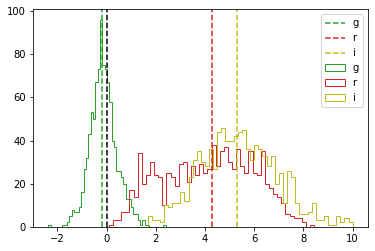

In [36]:
# step 1: estimate peak epoch in each band
# estimate the peak phase
def estimate_peak(ds, band):
    color = colors.BAND_COLOR_MAP[band]
    N = 1000
    peak_t = np.empty(N, dtype=np.float)
    trange = 10
    #t_grid = ds.transient.prior_t0 + np.linspace(-trange, trange)
    for i in range(N):
        t_grid = ds.transient.prior_t0 + np.sort(np.random.uniform(-trange, trange, size=50))
        lc = ds.get_interpolated(band=band, t_grid=t_grid, sample='random', parametric=False)
        # find the brightest data point (magnitude -> smallest numeric value)
        max_idx = np.argmin(lc)
        peak_t[i] = t_grid[max_idx]
        #plt.plot(t_grid, lc)
    mean_peak_t = np.nanmedian(peak_t)
    std_peak_t = np.nanstd(peak_t)
    q15_peak_t = np.percentile(peak_t, 15.89)
    q85_peak_t = np.percentile(peak_t, 84.1)
    #print(mean_peak_t)
    #print(np.nanstd(peak_t))
    plt.hist(peak_t - ds.transient.prior_t0, bins=50, label=band, color=color, histtype='step')
    plt.axvline(mean_peak_t - ds.transient.prior_t0, ls='--', label=band, color=color)
    
    return mean_peak_t, std_peak_t, q15_peak_t, q85_peak_t, peak_t
plt.axvline(0, ls='--', color='black')
peak_times = {}

for band in 'gri':
    peak_times[band] = estimate_peak(ds_19odp, band)
plt.legend()

pprint.pprint(peak_times)

In [35]:
# step 2: now try to estimate the epoch when we turn off the plateau..
# idea: time when flux[q15] > flux_plateau[q85]

def estimate_start_rise(ds, band):
    color = colors.BAND_COLOR_MAP[band]
    
    interpolator = ds.get_interpolator(band)
    trace = interpolator.parameter_trace_table
    
    N = 1000
    M = 25
    rise_t = np.empty(N, dtype=np.float)
    for i in range(N):
        sample_idx = np.random.randint(len(trace))
        t_grid = ds.first_detection_mjd_band(band) + np.sort(np.random.uniform(1, 15, size=50))
        lcs = []
        for j in range(M):
            lc = interpolator.sample_lc(t_grid, sample=sample_idx)
            lcs.append(lc)
        mean = np.empty_like(t_grid)
        std = np.empty_like(t_grid)
        for j in range(M):
            samples = np.array([x[j] for x in lcs])
            mean[j] = np.nanmean(samples)
            std[j] = np.nanstd(samples)
        plateau_level = trace['plateau_level'][sample_idx]
        
        # all samples that are brighter than the plateau level
        # first point above it method
        idx = mean+3*std < plateau_level
        min_t = t_grid[idx][0]
        # last point now above it method (doesnt work for some reason)
        #idx = mean+3*std < plateau_level
        #min_t = t_grid[~idx][-1]
        
        rise_t[i] = min_t
    plt.hist(rise_t - ds.transient.prior_t0, bins=50, label=band, color=color, histtype='step')
    mean_rise_t = np.nanmedian(rise_t)
    std_rise_t = np.nanstd(rise_t)
    q15_rise_t = np.percentile(rise_t, 15.89)
    q85_rise_t = np.percentile(rise_t, 84.1)
    plt.axvline(mean_rise_t - ds.transient.prior_t0, ls='--', label=band, color=color)
    return mean_rise_t, std_rise_t, q15_rise_t, q85_rise_t, rise_t

rise_times = {}

for band in 'gri':
    rise_times[band] = estimate_start_rise(ds_19odp, band)
plt.legend()

pprint.pprint(rise_times)

{'g': (58718.94014465758,
       0.37840438630766865,
       58718.62092362884,
       58719.353529027736,
       array([58719.21431348, 58718.974584  , 58718.52714424, 58719.03749814,
       58719.13298225, 58719.13422025, 58718.69162338, 58718.63116735,
       58719.39561127, 58718.49301734, 58719.04440557, 58718.56240131,
       58718.74154382, 58718.60063346, 58719.27733351, 58719.02978482,
       58719.81076798, 58719.65357318, 58719.28564038, 58719.46100814,
       58718.94172379, 58718.61090325, 58718.68891693, 58718.75681769,
       58719.3850924 , 58718.73297018, 58718.57194499, 58719.44540551,
       58719.60678148, 58718.52388852, 58718.89717897, 58719.447726  ,
       58719.59559611, 58719.37483075, 58718.88342898, 58719.45362491,
       58719.71464926, 58718.64308349, 58720.14221421, 58718.8370916 ,
       58719.21717226, 58719.08056508, 58718.76537025, 58718.60991898,
       58718.6279972 , 58719.3237845 , 58719.02907971, 58719.39281894,
       58718.85767901, 58719.03654

In [34]:
# step3: now calculate the rise time
for band in 'gri':
    peak = peak_times[band]
    rise = rise_times[band]
    
    # rise_q85 peak_q15
    min_t = peak[2] - rise[3]
    # rise_q15 peak_q85
    max_t = peak[3] - rise[2]
    # rise_mean peak_mean
    mean_t = peak[0] - rise[0]
    print(band, min_t, mean_t, max_t)

g 14.075242559440085 14.964625742431963 15.759615052229492
r 16.748196987144183 19.38261155017244 21.461454055308423
i 16.78164076514804 18.57509252953605 20.589233128310298


In [40]:
for band in 'gri':
    color = colors.BAND_COLOR_MAP[band]
    peak = peak_times[band]
    rise = rise_times[band]
    
    print(band, np.percentile(peak[4] - rise[4], [15.89, 50, 84.1]))
    
    plt.hist(peak[4] - rise[4], bins=50, label=band, color=color, histtype='step')
plt.xlabel('Rise Time [d]')
plt.legend()

g [14.2474076  14.87080689 15.50783132]
r [17.16614101 19.47597149 21.39039828]
i [16.95748813 18.55761952 20.2622101 ]


/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


[1.73144166 2.08709352 2.44774418]


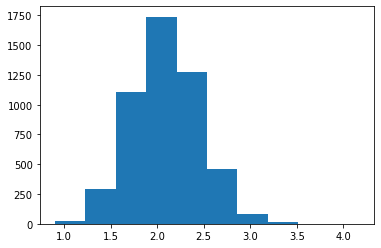

In [4]:
## PLATEAU LUMINOSITY
# determine by integrating the fluxes of the gri bands

# datasets
data = {}
for band in 'gri':
    data[band] = ds_19odp.get_phot_model('plateau-contardo', band).parameter_trace_table

# constants for the filters (from http://svo2.cab.inta-csic.es/svo/theory//fps3/index.php?mode=browse&gname=Palomar&gname2=ZTF&asttype=)
# (band, wavelength, AB zeropoint flux [cgs])
ZTF_INS = [
    ('g', 4803, 4.88043e-9, 0),
    ('r', 6434, 2.70846e-9, 1),
    ('i', 7971, 1.75033e-9, 2)
]

bands = [x[0] for x in ZTF_INS]
waves = np.array([x[1] for x in ZTF_INS])

lums = np.empty(5000)
for i in range(len(lums)):
    fluxes = np.empty(3)
    for band, _wave, zp_flux, j in ZTF_INS:
        idx = np.random.randint(0, len(data[band]))
        mag = data[band]['plateau_level'][idx]
        fluxes[j] = zp_flux * 10**(-0.4 * mag)
    flux_qbol = np.trapz(fluxes, waves)
    dist_cm = np.random.normal(64, 5) * u.Mpc.to(u.cm)
    lums[i] = 4*np.pi*dist_cm**2*flux_qbol
print(np.percentile(lums/1e41, [15.6, 50, 84.1]))
plt.hist(lums/1e41);

In [25]:
# alternative estimate using the swift photometry
uvot_tbl = table.Table.read('../data/uvot_phot.txt', format='ascii')
#uvot_tbl.pprint()
idx = np.abs(uvot_tbl['JD'] - 2458718) < 1
uvot_tbl[idx].pprint()
uvot_data = uvot_tbl[idx]

# constants for the filters (from http://svo2.cab.inta-csic.es/svo/theory//fps3/index.php?mode=browse&gname=Swift&asttype=)
# (band, wavelength, AB zeropoint flux [cgs])
UVOT_INS = [
    ('UVW1', 2629.35, 1.5109e-8, 0),
    ('UVW2', 1967.37, 2.50225e-8, 1),
    ('UVM2', 2259.84, 2.1583e-8, 2),
    ('U', 3468.51, 8.78064e-9, 3),
    ('B', 4379.85, 5.76258e-9, 4),
    ('V', 5450.09, 3.72255e-9, 5)
]

bands = [x[0] for x in UVOT_INS]
waves = np.array([x[1] for x in UVOT_INS])

lums2 = np.empty(5000)
for i in range(len(lums2)):
    fluxes = np.empty_like(waves)
    for band, _wave, zp_flux, j in UVOT_INS:
        idx = uvot_data['FILTER'] == band
        mag = np.random.normal(uvot_data['AB_MAG'][idx], uvot_data['AB_MAG_ERR'][idx])
        fluxes[j] = zp_flux * 10**(-0.4 * mag)
    flux_qbol = np.trapz(fluxes, waves)
    dist_cm = np.random.normal(64, 5) * u.Mpc.to(u.cm)
    lums2[i] = 4*np.pi*dist_cm**2*flux_qbol
print(np.percentile(lums2/1e41, [15.6, 50, 84.1]))
plt.hist(lums2/1e41);

        JD         FILTER  AB_MAG AB_MAG_ERR AB_MAG_LIM  EXPOSURE
------------------ ------ ------- ---------- ---------- ---------
 2458718.671532725   UVW1 21.1707     0.3498    21.2422   157.237
 2458718.672967196      U 20.4926     0.3356    20.6174   78.5208
2458718.6739443885      B 18.9096     0.1832    19.9058   78.5099
 2458718.676326107   UVW2 22.8054     0.5947    22.0495  314.7237
 2458718.678691991      V 18.5903     0.2777     18.981   78.5099
2458718.6864458714   UVM2 22.4146     0.2873    22.7858 1232.0625
[1.14436131 1.41762321 1.72195064]


        JD         FILTER  AB_MAG AB_MAG_ERR AB_MAG_LIM  EXPOSURE
------------------ ------ ------- ---------- ---------- ---------
 2458718.671532725   UVW1 21.1707     0.3498    21.2422   157.237
 2458718.672967196      U 20.4926     0.3356    20.6174   78.5208
2458718.6739443885      B 18.9096     0.1832    19.9058   78.5099
 2458718.676326107   UVW2 22.8054     0.5947    22.0495  314.7237
 2458718.678691991      V 18.5903     0.2777     18.981   78.5099
2458718.6864458714   UVM2 22.4146     0.2873    22.7858 1232.0625
[2.06099469 2.55900346 3.15524916]


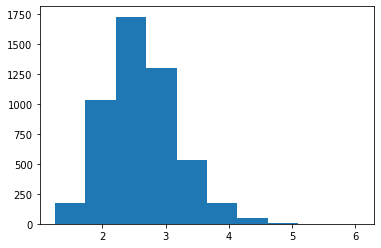

In [19]:
# alternative estimate using the swift photometry PLUS ZTF i-band
uvot_tbl = table.Table.read('../data/uvot_phot.txt', format='ascii')
#uvot_tbl.pprint()
idx = np.abs(uvot_tbl['JD'] - 2458718) < 1
uvot_tbl[idx].pprint()
uvot_data = uvot_tbl[idx]

# constants for the filters (from http://svo2.cab.inta-csic.es/svo/theory//fps3/index.php?mode=browse&gname=Swift&asttype=)
# (band, wavelength, AB zeropoint flux [cgs])
UVOT_INS = [
    ('UVW1', 2629.35, 1.5109e-8, 0),
    ('UVW2', 1967.37, 2.50225e-8, 1),
    ('UVM2', 2259.84, 2.1583e-8, 2),
    ('U', 3468.51, 8.78064e-9, 3),
    ('B', 4379.85, 5.76258e-9, 4),
    ('V', 5450.09, 3.72255e-9, 5),
    ('i', 7971, 1.75033e-9, 6)
]

bands = [x[0] for x in UVOT_INS]
waves = np.array([x[1] for x in UVOT_INS])

lums3 = np.empty(5000)
for i in range(len(lums3)):
    fluxes = np.empty_like(waves)
    for band, _wave, zp_flux, j in UVOT_INS:
        if band == 'i':
            mag = np.random.normal(18.93, 0.08)
        else:
            idx = uvot_data['FILTER'] == band
            mag = np.random.normal(uvot_data['AB_MAG'][idx], uvot_data['AB_MAG_ERR'][idx])
        fluxes[j] = zp_flux * 10**(-0.4 * mag)
    flux_qbol = np.trapz(fluxes, waves)
    dist_cm = np.random.normal(64, 5) * u.Mpc.to(u.cm)
    lums3[i] = 4*np.pi*dist_cm**2*flux_qbol
print(np.percentile(lums3/1e41, [15.6, 50, 84.1]))
plt.hist(lums3/1e41);

        JD         FILTER  AB_MAG AB_MAG_ERR AB_MAG_LIM  EXPOSURE
------------------ ------ ------- ---------- ---------- ---------
 2458718.671532725   UVW1 21.1707     0.3498    21.2422   157.237
 2458718.672967196      U 20.4926     0.3356    20.6174   78.5208
2458718.6739443885      B 18.9096     0.1832    19.9058   78.5099
 2458718.676326107   UVW2 22.8054     0.5947    22.0495  314.7237
 2458718.678691991      V 18.5903     0.2777     18.981   78.5099
2458718.6864458714   UVM2 22.4146     0.2873    22.7858 1232.0625
[2.02168155 2.4616199  2.93163619]


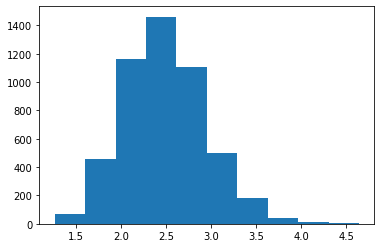

In [27]:
# alternative estimate using the swift photometry PLUS ZTF i-band PLUS ZTF r-band MINUS UVOT V-band
uvot_tbl = table.Table.read('../data/uvot_phot.txt', format='ascii')
#uvot_tbl.pprint()
idx = np.abs(uvot_tbl['JD'] - 2458718) < 1
uvot_tbl[idx].pprint()
uvot_data = uvot_tbl[idx]

# constants for the filters (from http://svo2.cab.inta-csic.es/svo/theory//fps3/index.php?mode=browse&gname=Swift&asttype=)
# (band, wavelength, AB zeropoint flux [cgs])
UVOT_INS = [
    ('UVW1', 2629.35, 1.5109e-8, 0),
    ('UVW2', 1967.37, 2.50225e-8, 1),
    ('UVM2', 2259.84, 2.1583e-8, 2),
    ('U', 3468.51, 8.78064e-9, 3),
    ('B', 4379.85, 5.76258e-9, 4),
    #('V', 5450.09, 3.72255e-9, 5),
    ('r', 6434, 2.70846e-9, 5),
    ('i', 7971, 1.75033e-9, 6)
]

bands = [x[0] for x in UVOT_INS]
waves = np.array([x[1] for x in UVOT_INS])

lums3 = np.empty(5000)
for i in range(len(lums3)):
    fluxes = np.empty_like(waves)
    for band, _wave, zp_flux, j in UVOT_INS:
        if band == 'i':
            mag = np.random.normal(18.93, 0.08)
        elif band == 'r':
            mag = np.random.normal(18.63, 0.07)
        else:
            idx = uvot_data['FILTER'] == band
            mag = np.random.normal(uvot_data['AB_MAG'][idx], uvot_data['AB_MAG_ERR'][idx])
        fluxes[j] = zp_flux * 10**(-0.4 * mag)
    flux_qbol = np.trapz(fluxes, waves)
    dist_cm = np.random.normal(64, 5) * u.Mpc.to(u.cm)
    lums3[i] = 4*np.pi*dist_cm**2*flux_qbol
print(np.percentile(lums3/1e41, [15.6, 50, 84.1]))
plt.hist(lums3/1e41);

[0.58570452 0.893683   1.34824392]
[0.34978896 0.54775275 0.8441687 ]
[0.72233367 1.11130413 1.68986969]


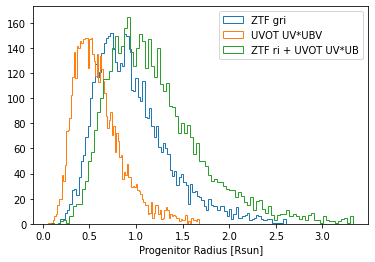

In [30]:
## PIRO PROGENITOR RADIUS
# use the previously estimate L_p
opacity = 0.07/0.2
m_ejecta = np.random.normal(5.4, 1.4, size=len(lums))
e_kin = np.random.normal(6.4, 1.5, size=len(lums))
radius = (lums / 7e40 * opacity**0.69 * m_ejecta**0.67 / e_kin**0.85) ** (1/0.78)
print(np.percentile(radius, [15.6, 50, 84.1]))
plt.xlabel('Progenitor Radius [Rsun]')
idx = radius < np.nanpercentile(radius, 99)
plt.hist(radius[idx], bins=100, histtype='step', label='ZTF gri');

radius = (lums2 / 7e40 * opacity**0.69 * m_ejecta**0.67 / e_kin**0.85) ** (1/0.78)
print(np.percentile(radius, [15.6, 50, 84.1]))
idx = radius < np.nanpercentile(radius, 99)
plt.hist(radius[idx], bins=100, histtype='step', label='UVOT UV*UBV');

radius = (lums3 / 7e40 * opacity**0.69 * m_ejecta**0.67 / e_kin**0.85) ** (1/0.78)
print(np.percentile(radius, [15.6, 50, 84.1]))
idx = radius < np.nanpercentile(radius, 99)
plt.hist(radius[idx], bins=100, histtype='step', label='ZTF ri + UVOT UV*UB');
plt.legend();

[0.81122088 1.24221863 1.87703133]


<ipython-input-11-c618ebc82286>:5: RuntimeWarning: invalid value encountered in power
  radius = (lums / 5.4e40 * opacity**0.69 * m_ejecta**0.67 / e_kin**0.85) ** (1/0.78)


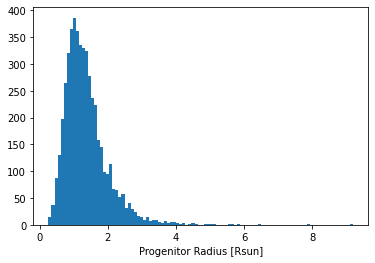

In [11]:
# same but assuming T_c = 0.4 (no reason.. just curious)
opacity = 0.07/0.2
m_ejecta = np.random.normal(5.4, 1.4, size=len(lums))
e_kin = np.random.normal(6.4, 1.5, size=len(lums))
radius = (lums / 5.4e40 * opacity**0.69 * m_ejecta**0.67 / e_kin**0.85) ** (1/0.78)
print(np.nanpercentile(radius, [15.6, 50, 84.1]))
plt.xlabel('Progenitor Radius [Rsun]')
plt.hist(radius, bins=100);

[0.42083449 0.64146608 0.98167881]


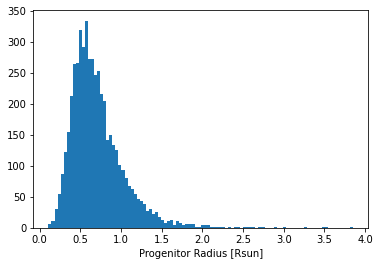

In [12]:
# same but assuming T_c = 1.0 (based on the Rabinak paper)
opacity = 0.07/0.2
m_ejecta = np.random.normal(5.4, 1.4, size=len(lums))
e_kin = np.random.normal(6.4, 1.5, size=len(lums))
radius = (lums / 9.1e40 * opacity**0.69 * m_ejecta**0.67 / e_kin**0.85) ** (1/0.78)
print(np.nanpercentile(radius, [15.6, 50, 84.1]))
plt.xlabel('Progenitor Radius [Rsun]')
plt.hist(radius, bins=100);

<ipython-input-7-27a2a9d77929>:7: RuntimeWarning: invalid value encountered in power
  t_p = 20 * e_kin**0.18 * radius**0.62 / opacity **0.69 / m_ejecta ** 0.67 # hrs


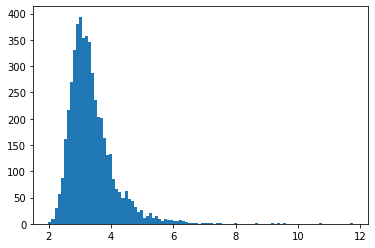

In [7]:
## PIRO PROGENITOR PLATEAU TIME
# assuming R of 1
opacity = 0.07/0.2
m_ejecta = np.random.normal(5.4, 1.4, size=len(lums))
e_kin = np.random.normal(6.4, 1.5, size=len(lums))
radius = 10
t_p = 20 * e_kin**0.18 * radius**0.62 / opacity **0.69 / m_ejecta ** 0.67 # hrs
plt.hist(t_p/24, bins=100);